# Analysis of Diabetic Patient Data

In [1]:
# Upload the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
dbts = pd.read_csv('data/diabetes.csv')

#### Data cleaning

In [2]:
# Replace these zero values with NaN
nonzero_independents = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
independents = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dbts[nonzero_independents] = dbts[nonzero_independents].replace({0:np.nan})
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [4]:
# double check the missing values count
dbts.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
# fill missing values with mean column values
dbts['Glucose'].replace({None:dbts['Glucose'].mean()}, inplace=True)
dbts['BloodPressure'].replace({None:dbts['BloodPressure'].mean()}, inplace=True)
dbts['SkinThickness'].replace({None:dbts['SkinThickness'].mean()}, inplace=True)
dbts['Insulin'].replace({None:dbts['Insulin'].mean()}, inplace=True)
dbts['BMI'].replace({None:dbts['BMI'].mean()}, inplace=True)
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [6]:
dbts[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].min() ==0

Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
dtype: bool

#### 1. Is there a relationship between age & diabetes?

<Axes: xlabel='Outcome', ylabel='Age'>

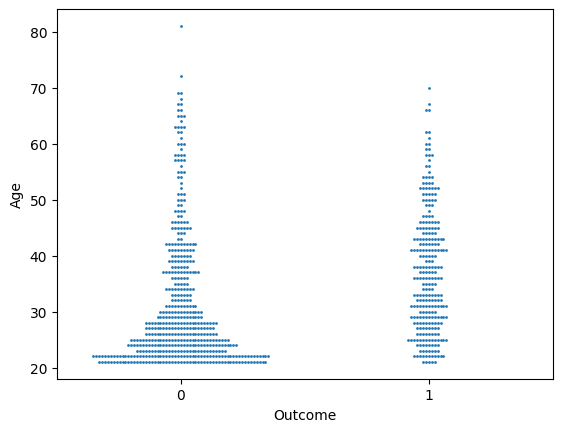

In [7]:
sns.swarmplot(x='Outcome', y='Age', data=dbts, size=2, alpha=1)

**No apparent correlation** between age and diabetes. Diabetes can happen to people of any age.

#### 2. Is there a relationship between number of pregnancies & diabetes?

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

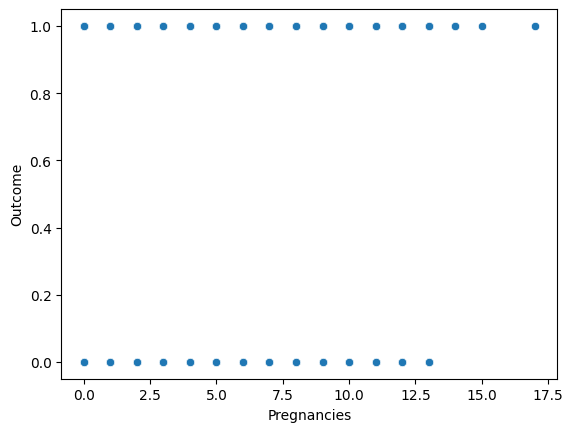

In [9]:
sns.scatterplot(data=dbts, x='Pregnancies', y='Outcome')

**No apparent correlation** between number of times pregnant and diabetes. 50% of people with diabetes fall between 1-8 times pregnant.

#### 3. Are people with high blood pressure prone to diabetes? 

##### Rules to divide blood pressure range
- BloodPressure < 80 then “Normal”
- 80 <= BloodPressure < 90 then "At risk" 
- **90 <= BloodPressure then “High blood pressure”**

In [10]:
# Let's look at the first few rows
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
# Categorize
def blood_pressure_categorize(x):
    if x < 80: return 'Normal'
    if 80 <= x < 90: return 'At risk'
    if 90 <= x: return 'High blood pressure'

dbts['BloodPressure_Category'] = dbts['BloodPressure'].apply(blood_pressure_categorize)
dbts['BloodPressure_Category']

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
763    Normal
764    Normal
765    Normal
766    Normal
767    Normal
Name: BloodPressure_Category, Length: 768, dtype: object

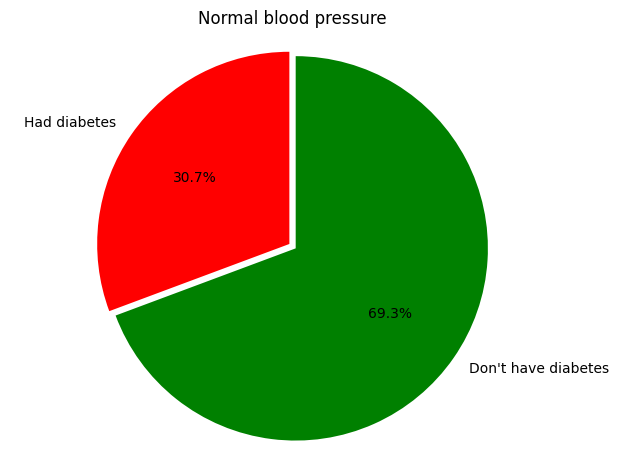

In [12]:
# normal blood pressure
positive = ((dbts['BloodPressure_Category']=='Normal') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='Normal') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('Normal blood pressure')

plt.tight_layout()
plt.show()

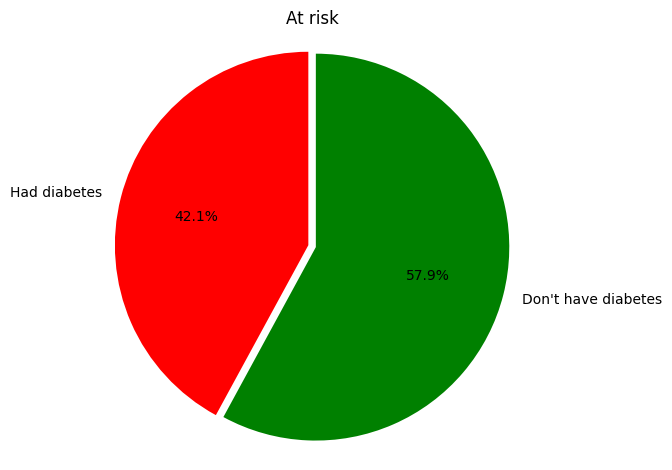

In [13]:
# at risk
positive = ((dbts['BloodPressure_Category']=='At risk') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='At risk') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('At risk')

plt.tight_layout()
plt.show()

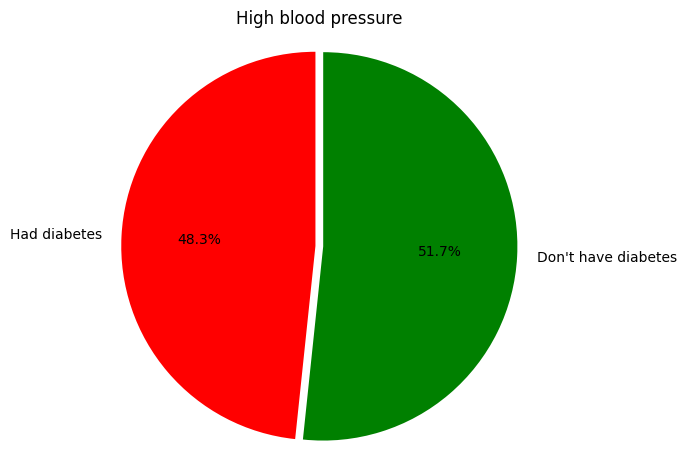

In [14]:
# high blood pressure
positive = ((dbts['BloodPressure_Category']=='High blood pressure') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='High blood pressure') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('High blood pressure')

plt.tight_layout()
plt.show()

Hence, people with **high blood pressure** are **more prone** to diabetes

#### 4. Are obese people prone to diabetes? (BMI > 30)

##### Rules to divide BMI range
- BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- **30 <= BMI then “Obese”**

In [15]:
def BMI_categorize(x):
    if x < 18.5: return 'Underweight'
    if 18.5 <= x < 25: return 'Normal'
    if 25 <= x < 30: return 'Overweight'
    if 30 <= x: return 'Obese'

dbts['BMI_Cateogry'] = dbts['BMI'].apply(BMI_categorize)
dbts['BMI_Cateogry']

0           Obese
1      Overweight
2          Normal
3      Overweight
4           Obese
          ...    
763         Obese
764         Obese
765    Overweight
766         Obese
767         Obese
Name: BMI_Cateogry, Length: 768, dtype: object

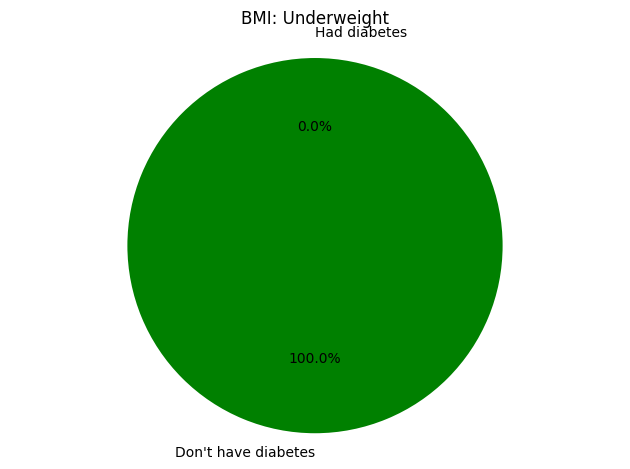

In [16]:
# BMI: Underweight
positive = ((dbts['BMI_Cateogry']=='Underweight') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Underweight') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Underweight')

plt.tight_layout()
plt.show()

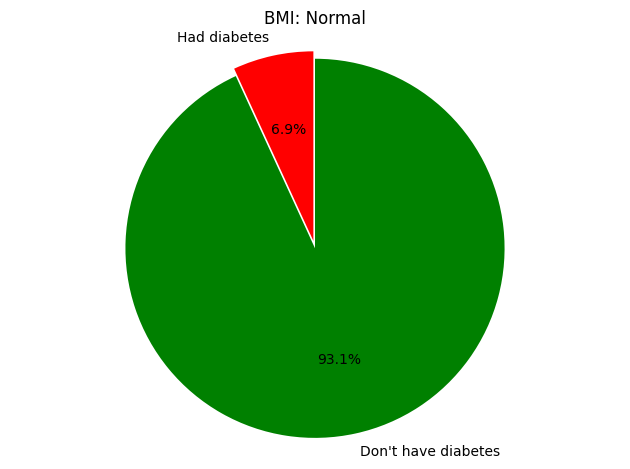

In [17]:
# BMI: Normal
positive = ((dbts['BMI_Cateogry']=='Normal') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Normal') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Normal')

plt.tight_layout()
plt.show()

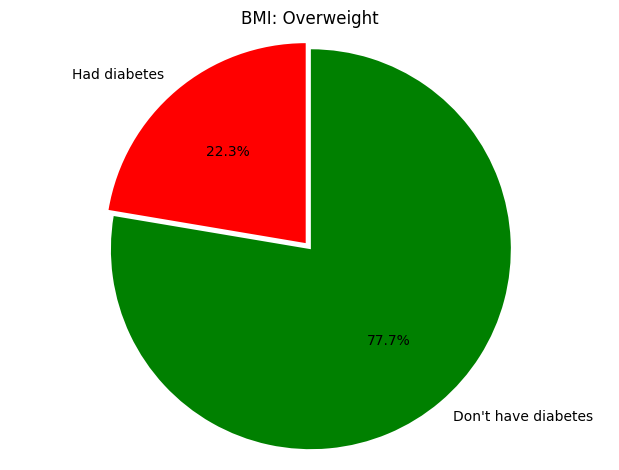

In [18]:
# BMI: Overweight
positive = ((dbts['BMI_Cateogry']=='Overweight') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Overweight') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Overweight')

plt.tight_layout()
plt.show()

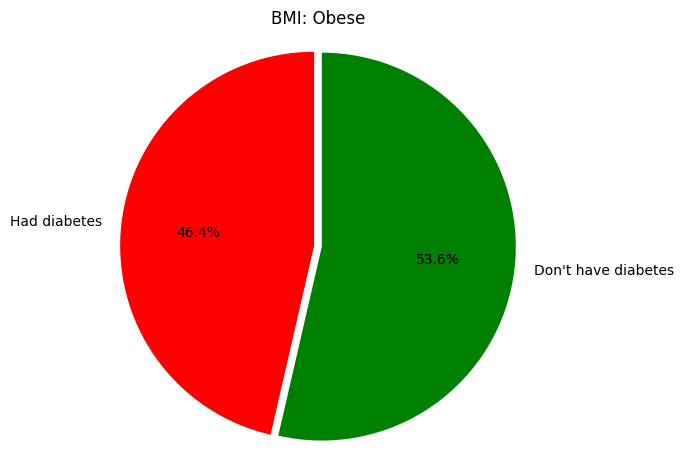

In [19]:
# BMI: Obese
positive = ((dbts['BMI_Cateogry']=='Obese') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Obese') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Obese')

plt.tight_layout()
plt.show()

Hence, people with high BMI index, especially **obese people (BMI > 30) are more prone** to diabetes